Trabalho de Data Science - Inteligencia Artifical EEL874

Lucas Manoel de Assis Ventura Trogo

DRE 122168184

In [28]:
import math as m
from math import *
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import *
import warnings
warnings.filterwarnings("ignore")

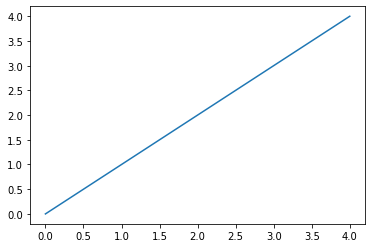

In [29]:
plot(arange(5))

In [30]:
df = pd.read_csv(r'treinamento.csv')
df.head(10)

,ID,Sexo,Casado,Dependentes,Educacao,Autonomo,Renda,RendaSocio,ValorEmprestimo,Prazo,Adimplente,AreaPropriedade,Concedido
0,LP001002,Masculino,Nao,0,Superior,Nao,5849,0.0,NaN,360.0,1.0,Urbano,S
1,LP001003,Masculino,Sim,1,Superior,Nao,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Masculino,Sim,0,Superior,Sim,3000,0.0,66.0,360.0,1.0,Urbano,S
3,LP001006,Masculino,Sim,0,Nao Superior,Nao,2583,2358.0,120.0,360.0,1.0,Urbano,S
4,LP001008,Masculino,Nao,0,Superior,Nao,6000,0.0,141.0,360.0,1.0,Urbano,S
5,LP001011,Masculino,Sim,2,Superior,Sim,5417,4196.0,267.0,360.0,1.0,Urbano,S
6,LP001013,Masculino,Sim,0,Nao Superior,Nao,2333,1516.0,95.0,360.0,1.0,Urbano,S
7,LP001014,Masculino,Sim,3+,Superior,Nao,3036,2504.0,158.0,360.0,0.0,SemiUrbano,N
8,LP001018,Masculino,Sim,2,Superior,Nao,4006,1526.0,168.0,360.0,1.0,Urbano,S
9,LP001020,Masculino,Sim,1,Superior,Nao,12841,10968.0,349.0,360.0,1.0,SemiUrbano,N


In [31]:
df.describe()

,Renda,RendaSocio,ValorEmprestimo,Prazo,Adimplente
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               614 non-null    object 
 1   Sexo             601 non-null    object 
 2   Casado           611 non-null    object 
 3   Dependentes      599 non-null    object 
 4   Educacao         614 non-null    object 
 5   Autonomo         582 non-null    object 
 6   Renda            614 non-null    int64  
 7   RendaSocio       614 non-null    float64
 8   ValorEmprestimo  592 non-null    float64
 9   Prazo            600 non-null    float64
 10  Adimplente       564 non-null    float64
 11  AreaPropriedade  614 non-null    object 
 12  Concedido        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [33]:
df.corr()

,Renda,RendaSocio,ValorEmprestimo,Prazo,Adimplente
Renda,1.000000,-0.116605,0.570909,-0.045306,-0.014715
RendaSocio,-0.116605,1.000000,0.188619,-0.059878,-0.002056
ValorEmprestimo,0.570909,0.188619,1.000000,0.039447,-0.008433
Prazo,-0.045306,-0.059878,0.039447,1.000000,0.001470
Adimplente,-0.014715,-0.002056,-0.008433,0.001470,1.000000


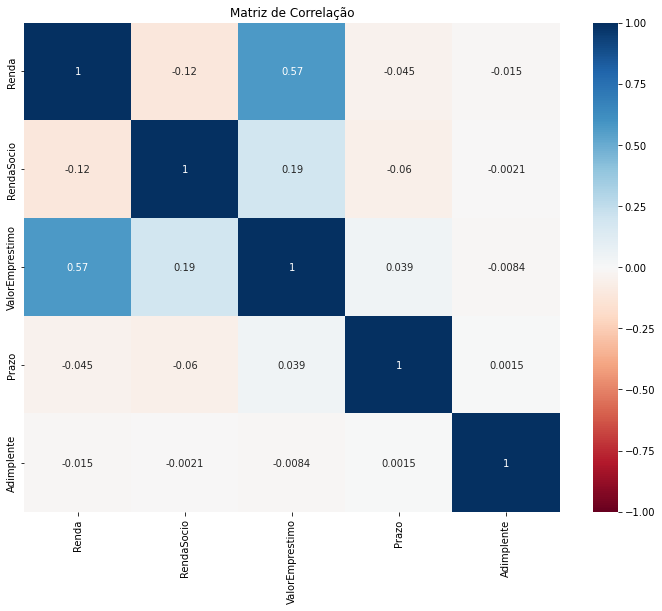

In [34]:
plt.figure(figsize=(12, 9))
s = sns.heatmap(df.corr(),
                annot=True,
                cmap='RdBu',
                vmin=-1,
                vmax=1)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.title('Matriz de Correlação')
plt.show()

In [35]:
df['AreaPropriedade'].value_counts()

SemiUrbano    233
Urbano        202
Rural         179
Name: AreaPropriedade, dtype: int64

Text(0, 0.5, 'Renda')

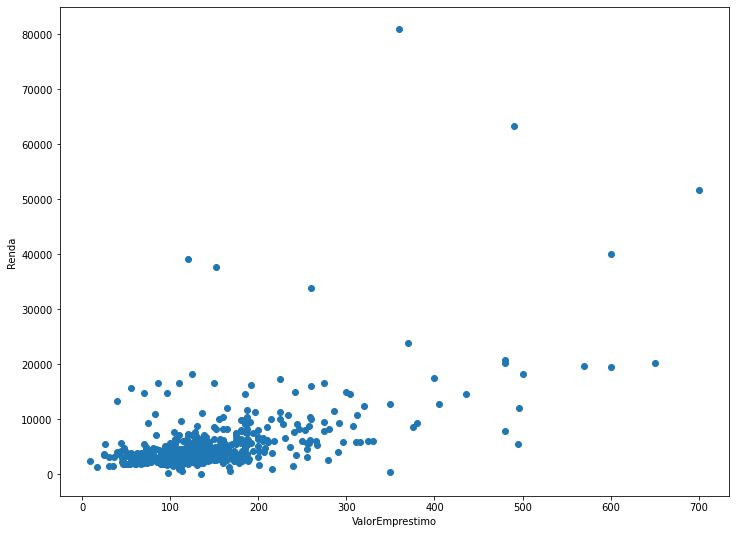

In [36]:
plt.figure(figsize=(12, 9))
plt.scatter(df['ValorEmprestimo'], df['Renda'])
plt.xlabel('ValorEmprestimo')
plt.ylabel('Renda')


<AxesSubplot:>

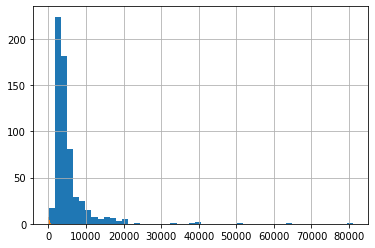

In [37]:
df['Renda'].hist(bins=50)
df['ValorEmprestimo'].hist(bins=50)

<AxesSubplot:>

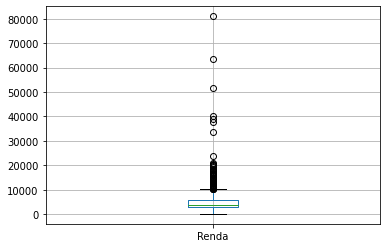

In [38]:
df.boxplot(column='Renda')

<AxesSubplot:title={'center':'Renda'}, xlabel='Educacao'>

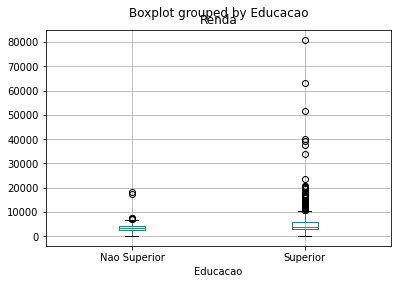

In [39]:
df.boxplot(column='Renda', by = 'Educacao')

<AxesSubplot:>

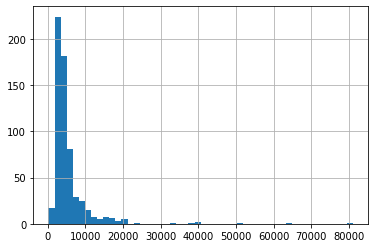

In [40]:
df['Renda'].hist(bins=50)

<AxesSubplot:xlabel='Adimplente'>

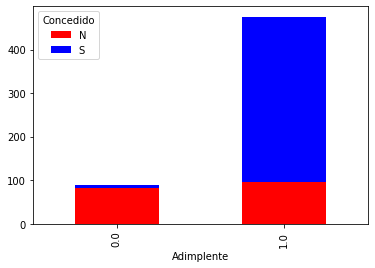

In [41]:
temp3 = pd.crosstab(df['Adimplente'], df['Concedido'])
temp3.plot(kind='bar', stacked=True, color=['red','blue'], grid=False)

In [42]:
df.apply(lambda x: sum(x.isnull()),axis=0)

ID                  0
Sexo               13
Casado              3
Dependentes        15
Educacao            0
Autonomo           32
Renda               0
RendaSocio          0
ValorEmprestimo    22
Prazo              14
Adimplente         50
AreaPropriedade     0
Concedido           0
dtype: int64

In [43]:
df['Sexo'].value_counts()

Masculino    489
Feminino     112
Name: Sexo, dtype: int64

In [44]:
df['Sexo'].fillna('Masculino',inplace=True)

In [45]:
df['ValorEmprestimo'].fillna(df['ValorEmprestimo'].mean(), inplace=True)

In [46]:
df.apply(lambda x: sum(x.isnull()),axis=0)
df['Autonomo'].fillna('Nao',inplace=True)
df['ValorEmprestimo'].fillna(df['ValorEmprestimo'].mean(), inplace=True)
df.apply(lambda x: sum(x.isnull()),axis=0)

ID                  0
Sexo                0
Casado              3
Dependentes        15
Educacao            0
Autonomo            0
Renda               0
RendaSocio          0
ValorEmprestimo     0
Prazo              14
Adimplente         50
AreaPropriedade     0
Concedido           0
dtype: int64

In [47]:
df = pd.read_csv(r'treinamento_sem_null.csv')
df.head(10)

,ID,Sexo,Casado,Dependentes,Educacao,Autonomo,Renda,RendaSocio,ValorEmprestimo,Prazo,Adimplente,AreaPropriedade,Concedido
0,LP001002,Masculino,Nao,0,Superior,Nao,5849,0,120,360,1,Urbano,S
1,LP001003,Masculino,Sim,1,Superior,Nao,4583,1508,128,360,1,Rural,N
2,LP001005,Masculino,Sim,0,Superior,Sim,3000,0,66,360,1,Urbano,S
3,LP001006,Masculino,Sim,0,Nao Superior,Nao,2583,2358,120,360,1,Urbano,S
4,LP001008,Masculino,Nao,0,Superior,Nao,6000,0,141,360,1,Urbano,S
5,LP001011,Masculino,Sim,2,Superior,Sim,5417,4196,267,360,1,Urbano,S
6,LP001013,Masculino,Sim,0,Nao Superior,Nao,2333,1516,95,360,1,Urbano,S
7,LP001014,Masculino,Sim,3,Superior,Nao,3036,2504,158,360,0,SemiUrbano,N
8,LP001018,Masculino,Sim,2,Superior,Nao,4006,1526,168,360,1,Urbano,S
9,LP001020,Masculino,Sim,1,Superior,Nao,12841,10968,349,360,1,SemiUrbano,N


<AxesSubplot:>

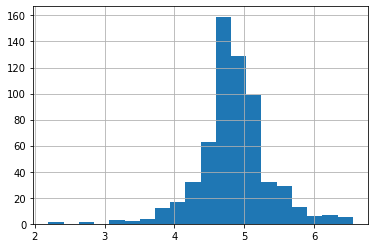

In [48]:
df['ValorEmprestimo_log'] = np.log(df['ValorEmprestimo'])
df['ValorEmprestimo_log'].hist(bins=20)

In [49]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Sexo','Casado','Dependentes','Educacao','Autonomo','AreaPropriedade', 'Concedido']
le = LabelEncoder()
for i in var_mod:
    print(i)
    df[i] = le.fit_transform(df[i].astype(str))
    print('le.classes_')
    print(list(le.classes_))
    print('inverse_transform')
    if i == 'Sexo' or i == 'Casado' or i == 'Educacao' or i == 'Autonomo' or i == 'Concedido':
        print(le.inverse_transform([0]), ': 0', le.inverse_transform([1]), ': 1')
    elif i == 'Dependentes':
        print(le.inverse_transform([0]), ': 0', le.inverse_transform([1]), ': 1', le.inverse_transform([2]), ': 2', le.inverse_transform([3]), ': 3')
    else:
        print(le.inverse_transform([0]), ': 0', le.inverse_transform([1]), ': 1', le.inverse_transform([2]), ': 2')



Sexo
le.classes_
['Feminino', 'Masculino']
inverse_transform
['Feminino'] : 0 ['Masculino'] : 1
Casado
le.classes_
['Nao', 'Sim']
inverse_transform
['Nao'] : 0 ['Sim'] : 1
Dependentes
le.classes_
['0', '1', '2', '3']
inverse_transform
['0'] : 0 ['1'] : 1 ['2'] : 2 ['3'] : 3
Educacao
le.classes_
['Nao Superior', 'Superior']
inverse_transform
['Nao Superior'] : 0 ['Superior'] : 1
Autonomo
le.classes_
['Nao', 'Sim']
inverse_transform
['Nao'] : 0 ['Sim'] : 1
AreaPropriedade
le.classes_
['Rural', 'SemiUrbano', 'Urbano']
inverse_transform
['Rural'] : 0 ['SemiUrbano'] : 1 ['Urbano'] : 2
Concedido
le.classes_
['N', 'S']
inverse_transform
['N'] : 0 ['S'] : 1


In [50]:
df.to_csv(r'RiscoCreditoFinal.csv')

In [51]:
df = pd.read_csv(r'RiscoCreditoFinal.csv')
df.head(10)

,Unnamed: 0,ID,Sexo,Casado,Dependentes,Educacao,Autonomo,Renda,RendaSocio,ValorEmprestimo,Prazo,Adimplente,AreaPropriedade,Concedido,ValorEmprestimo_log
0,0,LP001002,1,0,0,1,0,5849,0,120,360,1,2,1,4.787492
1,1,LP001003,1,1,1,1,0,4583,1508,128,360,1,0,0,4.852030
2,2,LP001005,1,1,0,1,1,3000,0,66,360,1,2,1,4.189655
3,3,LP001006,1,1,0,0,0,2583,2358,120,360,1,2,1,4.787492
4,4,LP001008,1,0,0,1,0,6000,0,141,360,1,2,1,4.948760
5,5,LP001011,1,1,2,1,1,5417,4196,267,360,1,2,1,5.587249
6,6,LP001013,1,1,0,0,0,2333,1516,95,360,1,2,1,4.553877
7,7,LP001014,1,1,3,1,0,3036,2504,158,360,0,1,0,5.062595
8,8,LP001018,1,1,2,1,0,4006,1526,168,360,1,2,1,5.123964
9,9,LP001020,1,1,1,1,0,12841,10968,349,360,1,1,0,5.855072


In [52]:
X = df.drop('Adimplente', axis=1)
y = df[['Adimplente']]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=randint(1,20))
X_train

,Unnamed: 0,ID,Sexo,Casado,Dependentes,Educacao,Autonomo,Renda,RendaSocio,ValorEmprestimo,Prazo,AreaPropriedade,Concedido,ValorEmprestimo_log
282,282,LP001915,1,1,2,1,0,2301,9857999878,78,180,2,1,4.356709
336,336,LP002110,1,1,1,1,0,5250,688,160,360,0,1,5.075174
409,409,LP002317,1,1,3,1,0,81000,0,360,360,0,0,5.886104
17,17,LP001036,0,0,0,1,0,3510,0,76,360,2,0,4.330733
208,208,LP001699,1,0,0,1,0,2479,0,59,360,2,1,4.077537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318,318,LP002043,0,0,1,1,0,3541,0,112,360,1,1,4.718499
362,362,LP002175,1,1,0,1,0,4750,2333,130,360,2,1,4.867534
335,335,LP002106,1,1,0,1,1,5503,4490,70,360,1,1,4.248495
365,365,LP002181,1,0,0,0,0,6216,0,133,360,0,0,4.890349


In [65]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

print('Acurácia do Classificador Logistic regression do conjunto de teste: {:.2f}'
     .format(logreg.score(X_test, y_test)))

ValueError: could not convert string to float: 'LP001915'

In [59]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier().fit(X_train, y_train)

print('Acurácia do Classificador Decision Tree do conjunto de teste:: {:.2f}'
     .format(clf.score(X_test, y_test)) * 100)

ValueError: could not convert string to float: 'LP001915'

In [ ]:
from sklearn.svm import SVC
svm = SVC()
svm.fit(X_train, y_train.values.ravel())

print('Acurácia do Classificador SVM do conjunto de teste: {:.2f}'
     .format(svm.score(X_test, y_test)))

ValueError: could not convert string to float: 'LP001316'

In [ ]:
#Import models from scikit learn module:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold #For K-fold cross validation
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

#Generic function for making a classification model and accessing performance:
def classification_model(model, data, predictors, outcome):
  #Fit the model:
  model.fit(data[predictors],data[outcome])

 #Make predictions on training set:
  predictions = model.predict(data[predictors])

  #Print accuracy
  accuracy = metrics.accuracy_score(predictions,data[outcome])
  print("Accuracia :{0:.3%}".format(accuracy))

  #Print recall
  recall = recall_score(predictions,data[outcome], average='macro')
  print("Recall :{0:.3%}".format(recall))

  #Print Precisão
  precisao = precision_score(predictions,data[outcome], average='macro')
  print("Precisão :{0:.3%}".format(precisao))

  #Print f1
  f1 = f1_score(predictions,data[outcome], average='macro')
  print("F1 :{0:.3%}".format(f1))

  #Perform k-fold cross-validation with 5 folds
  kf = KFold(n_splits=5)
  error = []
  for train, test in kf.split(data):
    # Filter training data
    train_predictors = (data[predictors].iloc[train,:])

    # The target we're using to train the algorithm.
    train_target = data[outcome].iloc[train]

    # Training the algorithm using the predictors and target.
    model.fit(train_predictors, train_target)

    #Record error from each cross-validation run
    error.append(model.score(data[predictors].iloc[test,:], data[outcome].iloc[test]))

  print ("Cross-Validation : {0:.3%}".format(np.mean(error)))

  #Fit the model again so that it can be refered outside the function:
  model.fit(data[predictors],data[outcome])


In [ ]:
outcome_var = 'Concedido'
model = LogisticRegression(solver='lbfgs')
predictor_var = ['Adimplente']
classification_model(model, df,predictor_var,outcome_var)

In [ ]:
model = DecisionTreeClassifier()
predictor_var = ['Adimplente','Sexo','Casado','Educacao']
classification_model(model, df,predictor_var,outcome_var)

model = DecisionTreeClassifier()
predictor_var = ['Sexo','Casado','Educacao']
classification_model(model, df,predictor_var,outcome_var)

In [ ]:
model = RandomForestClassifier(n_estimators=100)
predictor_var = ['Sexo','Casado','Educacao', 'Dependentes', 'Autonomo', 'Adimplente', 'AreaPropriedade', 'ValorEmprestimo_log']
classification_model(model, df,predictor_var,outcome_var)

In [ ]:
featimp = pd.Series(model.feature_importances_, index=predictor_var).sort_values(ascending=False)
print (featimp)

In [ ]:
from sklearn.metrics import accuracy_score


from sklearn.metrics import auc


from sklearn.metrics import roc_curve


from sklearn.metrics import roc_auc_score


from sklearn.metrics import average_precision_score


from sklearn.metrics import confusion_matrix


from sklearn.metrics import multilabel_confusion_matrix


from sklearn.metrics import v_measure_score


from sklearn.metrics import silhouette_score


from sklearn.metrics import r2_score